In [1]:
from utils import *

import pandas as pd
import numpy as np
from pycaret.classification import *
from sklearn.impute import KNNImputer

In [2]:
df6 = pd.read_pickle("./pickles_temp/V4_4.pkl") 

In [3]:
df6

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,XEgV,0,Lake Nyasa,...,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,2011
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,2013
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional,2013
4,19728,0.0,Action In A,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional,2013
59396,27263,4700.0,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,functional,2011
59397,37057,0.0,9JgB,1532.5,9xav,34.017087,-8.750434,Mashine,0,Rufiji,...,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,functional,2011
59398,31282,0.0,Malec,820.5,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,2011


In [4]:
# Del V4.6 no había correlacion entre variables numéricas, pero había relacion con variables categóricas
    # vCramer con -public_meeting- wpt_name 0.86
    # vCramer con -public_meeting- subvillage 0.74
    # vCramer con -public_meeting- ward 0.55
# Trato 

df6_construction_year = df6.copy()
df6_construction_year = df6_construction_year[['id', 'wpt_name', 'subvillage', 'ward', 'construction_year']]
df6_construction_year

,id,wpt_name,subvillage,ward,construction_year
0,69572,XEgV,Mnyusi B,Mundindi,1999.0
1,8776,Zahanati,Nyamara,Natta,2010.0
2,34310,Kwa Mahundi,Majengo,Ngorika,2009.0
3,67743,Zahanati Ya Nanyumbu,Mahakamani,Nanyumbu,1986.0
4,19728,Shuleni,Kyanyamisa,Nyakasimbi,NaN
...,...,...,...,...,...
59395,60739,Area Three Namba 27,Kiduruni,Masama Magharibi,1999.0
59396,27263,Kwa Yahona Kuvala,Igumbilo,Ikondo,1996.0
59397,37057,Mashine,Madungulu,Chimala,NaN
59398,31282,Mshoro,Mwinyi,Mvumi Makulu,NaN


In [5]:
df6_construction_year_sin_missings = df6_construction_year.copy()
df6_construction_year_solo_missings = df6_construction_year.copy()
df6_construction_year_solo_missings = df6_construction_year_solo_missings[df6_construction_year_solo_missings['construction_year'].isna()]
df6_construction_year_sin_missings = df6_construction_year.dropna(subset=['construction_year'])
df6_construction_year_solo_missings

,id,wpt_name,subvillage,ward,construction_year
4,19728,Shuleni,Kyanyamisa,Nyakasimbi,NaN
6,19816,Kwa Ngomho,Ishinabulandi,Samuye,NaN
7,54551,Tushirikiane,Nyawishi Center,Chambo,NaN
8,53934,Kwa Ramadhan Musa,Imalauduki,Itetemia,NaN
9,46144,Kwapeto,Mkonomre,Kaisho,NaN
...,...,...,...,...,...
59384,72148,Chamkube,Songambele,Nyamiyaga,NaN
59392,40607,Benard Charles,Mbuyuni A,Mbuyuni,NaN
59393,48348,Kwa Peter,Masanga,Igunga,NaN
59397,37057,Mashine,Madungulu,Chimala,NaN


In [6]:
df6_construction_year_sin_missings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38691 entries, 0 to 59399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 38691 non-null  int64  
 1   wpt_name           38691 non-null  object 
 2   subvillage         38691 non-null  object 
 3   ward               38691 non-null  object 
 4   construction_year  38691 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
from sklearn.preprocessing import *
variables_categoricas = ['wpt_name', 'subvillage', 'ward']

le = LabelEncoder()
df6_no_missings = df6_construction_year_sin_missings.copy()
for variable in variables_categoricas:
    df6_no_missings[variable] = le.fit_transform(df6_no_missings[variable])
df6_no_missings

,id,wpt_name,subvillage,ward,construction_year
0,69572,26223,7652,926,1999.0
1,8776,26404,9937,1025,2010.0
2,34310,10915,5580,1051,2009.0
3,67743,26472,5510,1021,1986.0
5,9944,25506,7656,850,2009.0
...,...,...,...,...,...
59391,44885,5158,5992,641,1967.0
59394,11164,1788,4040,118,2007.0
59395,60739,933,2977,661,1999.0
59396,27263,17892,1635,190,1996.0


In [8]:
model_setup = setup(data=df6_no_missings, 
                    target = 'construction_year', 
                    session_id=1, 
                    )

,Description,Value
0,Session id,1
1,Target,construction_year
2,Target type,Multiclass
3,Target mapping,"1960.0: 0, 1961.0: 1, 1962.0: 2, 1963.0: 3, 1964.0: 4, 1965.0: 5, 1966.0: 6, 1967.0: 7, 1968.0: 8, 1969.0: 9, 1970.0: 10, 1971.0: 11, 1972.0: 12, 1973.0: 13, 1974.0: 14, 1975.0: 15, 1976.0: 16, 1977.0: 17, 1978.0: 18, 1979.0: 19, 1980.0: 20, 1981.0: 21, 1982.0: 22, 1983.0: 23, 1984.0: 24, 1985.0: 25, 1986.0: 26, 1987.0: 27, 1988.0: 28, 1989.0: 29, 1990.0: 30, 1991.0: 31, 1992.0: 32, 1993.0: 33, 1994.0: 34, 1995.0: 35, 1996.0: 36, 1997.0: 37, 1998.0: 38, 1999.0: 39, 2000.0: 40, 2001.0: 41, 2002.0: 42, 2003.0: 43, 2004.0: 44, 2005.0: 45, 2006.0: 46, 2007.0: 47, 2008.0: 48, 2009.0: 49, 2010.0: 50, 2011.0: 51, 2012.0: 52, 2013.0: 53"
4,Original data shape,"(38691, 5)"
5,Transformed data shape,"(38691, 5)"
6,Transformed train set shape,"(27083, 5)"
7,Transformed test set shape,"(11608, 5)"
8,Numeric features,4
9,Preprocess,True


In [9]:
best_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3972,0.0000,0.3972,0.3992,0.3966,0.3763,0.3764
1,0.4245,0.0000,0.4245,0.4275,0.4243,0.4048,0.4049
2,0.4164,0.0000,0.4164,0.4189,0.4160,0.3961,0.3962
3,0.3866,0.0000,0.3866,0.3892,0.3863,0.3650,0.3651
4,0.3988,0.0000,0.3988,0.4002,0.3984,0.3779,0.3780
5,0.4088,0.0000,0.4088,0.4160,0.4104,0.3887,0.3888
6,0.4088,0.0000,0.4088,0.4118,0.4086,0.3885,0.3886
7,0.3973,0.0000,0.3973,0.3997,0.3969,0.3762,0.3763
8,0.4040,0.0000,0.4040,0.4053,0.4029,0.3834,0.3834


In [10]:
df6_construction_year_solo_missings

,id,wpt_name,subvillage,ward,construction_year
4,19728,Shuleni,Kyanyamisa,Nyakasimbi,NaN
6,19816,Kwa Ngomho,Ishinabulandi,Samuye,NaN
7,54551,Tushirikiane,Nyawishi Center,Chambo,NaN
8,53934,Kwa Ramadhan Musa,Imalauduki,Itetemia,NaN
9,46144,Kwapeto,Mkonomre,Kaisho,NaN
...,...,...,...,...,...
59384,72148,Chamkube,Songambele,Nyamiyaga,NaN
59392,40607,Benard Charles,Mbuyuni A,Mbuyuni,NaN
59393,48348,Kwa Peter,Masanga,Igunga,NaN
59397,37057,Mashine,Madungulu,Chimala,NaN


In [11]:
df6_construction_year_solo_missings_copy = df6_construction_year_solo_missings.copy()
le = LabelEncoder()
for variable in variables_categoricas:
    df6_construction_year_solo_missings_copy[variable] = le.fit_transform(df6_construction_year_solo_missings_copy[variable])
df6_construction_year_solo_missings_copy.head(10)

,id,wpt_name,subvillage,ward,construction_year
4,19728,13347,3614,842,NaN
6,19816,7382,2126,921,NaN
7,54551,13799,7088,88,NaN
8,53934,7664,1881,252,NaN
9,46144,8831,4823,298,NaN
12,36957,12300,6489,64,NaN
14,53752,10710,5307,819,NaN
21,6091,10654,1338,204,NaN
27,20145,8954,853,833,NaN
30,46804,11702,2826,122,NaN


In [12]:
df6_construction_year_solo_missings_copy2 = df6_construction_year_solo_missings_copy.drop('construction_year', axis=1)


In [13]:
df6_construction_year_solo_missings_copy2 = predict_model(best_model, data=df6_construction_year_solo_missings_copy2)
df6_construction_year_solo_missings_copy2

,id,wpt_name,subvillage,ward,prediction_label,prediction_score
4,19728,13347,3614,842,2002,1.0
6,19816,7382,2126,921,1995,1.0
7,54551,13799,7088,88,1978,1.0
8,53934,7664,1881,252,1998,1.0
9,46144,8831,4823,298,2009,1.0
...,...,...,...,...,...,...
59384,72148,773,7764,855,1999,1.0
59392,40607,331,4524,597,1989,1.0
59393,48348,7598,4297,179,2009,1.0
59397,37057,9745,3975,107,2010,1.0


In [14]:
descripcion_categorica(df6_construction_year_solo_missings_copy2, 'prediction_label')

la columna no es de tipo objeto
la columna es de tipo  int32


In [15]:
df6_construction_year_solo_missings_copy2.dtypes

id                    int32
wpt_name              int32
subvillage            int32
ward                  int32
prediction_label      int32
prediction_score    float64
dtype: object

-------------- PREDICTION_LABEL ---------------
count    20709.000000
mean      1996.226954
std         12.662785
min       1960.000000
25%       1986.000000
50%       1999.000000
75%       2008.000000
max       2013.000000
Name: prediction_label, dtype: float64
prediction_label
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  0
ceros:  0


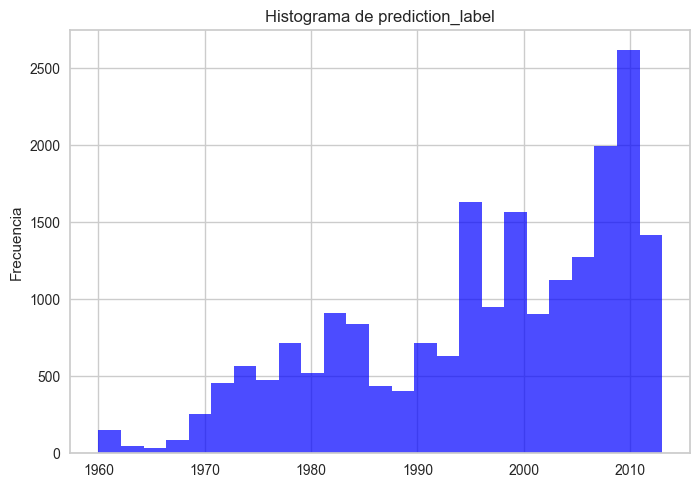

---------------------------------------------


In [16]:
descripcion_numerica(df6_construction_year_solo_missings_copy2, 'prediction_label')

-------------- CONSTRUCTION_YEAR ---------------
count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64
construction_year
Atípicos inferiores: 0.0
Atípicos superiores: 0.0
% valores atípicos: 0.0
missings:  20709
ceros:  0


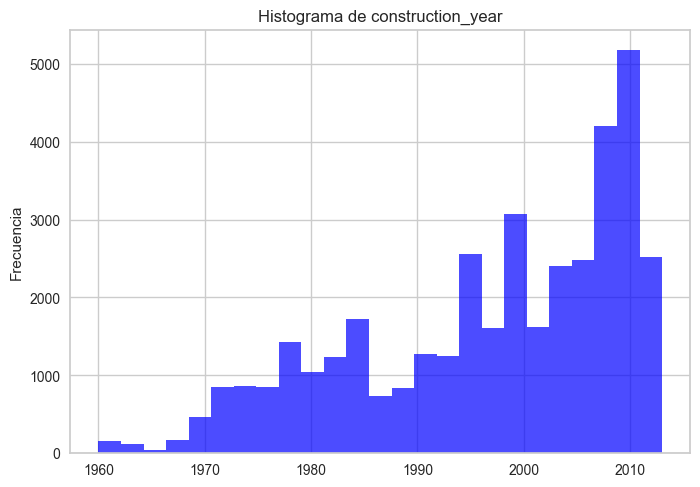

---------------------------------------------


In [17]:
# Esta proporción se parece mucho a la original. Me la quedo como válida
descripcion_numerica(df6, 'construction_year')

In [18]:
df6_construction_year_solo_missings_copy2['prediction_label']
df6_construction_year_solo_missings_copy2 = df6_construction_year_solo_missings_copy2.rename(columns={'prediction_label': 'construction_year'})
df6_construction_year_solo_missings_copy2.head()

,id,wpt_name,subvillage,ward,construction_year,prediction_score
4,19728,13347,3614,842,2002,1.0
6,19816,7382,2126,921,1995,1.0
7,54551,13799,7088,88,1978,1.0
8,53934,7664,1881,252,1998,1.0
9,46144,8831,4823,298,2009,1.0


In [20]:
# Añadimos los registros 
df6_construction_year_sin_missings = df6_construction_year_sin_missings.drop(['wpt_name', 'subvillage', 'ward'], axis = 1)
df6_construction_year_sin_missings.head(12)

,id,construction_year
0,69572,1999.0
1,8776,2010.0
2,34310,2009.0
3,67743,1986.0
5,9944,2009.0
10,49056,2011.0
11,50409,1987.0
13,50495,2009.0
15,61848,1991.0
16,48451,1978.0


In [22]:
df6_construction_year_solo_missings_copy2  = df6_construction_year_solo_missings_copy2.drop(['wpt_name', 'subvillage', 'ward', 'prediction_score'], axis = 1)
df6_construction_year_solo_missings_copy2

,id,construction_year
4,19728,2002
6,19816,1995
7,54551,1978
8,53934,1998
9,46144,2009
...,...,...
59384,72148,1999
59392,40607,1989
59393,48348,2009
59397,37057,2010


In [23]:
df6_construction_year_solo_missings_copy2.info()
df6_construction_year_sin_missings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20709 entries, 4 to 59398
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 20709 non-null  int32
 1   construction_year  20709 non-null  int32
dtypes: int32(2)
memory usage: 839.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 38691 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 38691 non-null  int64  
 1   construction_year  38691 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [24]:
# Lo convierto al mismo tipo de dato para que no de problemas al hacer concat
df6_construction_year_sin_missings['construction_year'] = df6_construction_year_sin_missings['construction_year'].astype('int32')


In [25]:
df6_construction_year_solo_missings_copy2.info()
df6_construction_year_sin_missings.info()
df6.info()
# parece que también tengo que cambiar id a in64 para que no problemas luego

<class 'pandas.core.frame.DataFrame'>
Index: 20709 entries, 4 to 59398
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 20709 non-null  int32
 1   construction_year  20709 non-null  int32
dtypes: int32(2)
memory usage: 839.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 38691 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 38691 non-null  int64
 1   construction_year  38691 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder          

In [26]:
df6_construction_year_solo_missings_copy2['id'] = df6_construction_year_solo_missings_copy2['id'].astype('int64')
df6_construction_year_solo_missings_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20709 entries, 4 to 59398
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 20709 non-null  int64
 1   construction_year  20709 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 920.5 KB


In [27]:
df6_construction_year_solo_missings_copy2.info()
df6_construction_year_sin_missings.info()
df6.info()
# Ahora sí puedo concatenar

<class 'pandas.core.frame.DataFrame'>
Index: 20709 entries, 4 to 59398
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 20709 non-null  int64
 1   construction_year  20709 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 920.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 38691 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 38691 non-null  int64
 1   construction_year  38691 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder

In [28]:
df6_construction_year_sin_missings = pd.concat([df6_construction_year_sin_missings, df6_construction_year_solo_missings_copy2])
# falta borrar construction_year del df6 y hacer el merge por ID de df6 y df6_construction_year_sin_missings

In [29]:
df6_construction_year_sin_missings

,id,construction_year
0,69572,1999
1,8776,2010
2,34310,2009
3,67743,1986
5,9944,2009
...,...,...
59384,72148,1999
59392,40607,1989
59393,48348,2009
59397,37057,2010


In [30]:
# falta borrar construction_year del df6 y
df6 = df6.drop('construction_year', axis=1)


In [31]:
# Hacer el merge por ID de df6 y df6_construction_year_sin_missings
df6 = pd.merge(df6, df6_construction_year_sin_missings, how = 'inner', on = 'id')

In [32]:
missing_values_summary(df6)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,0,0.0
gps_height,0,0.0
installer,0,0.0
longitude,0,0.0
latitude,0,0.0
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


In [33]:
column_order = ['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 
                'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'permit', 
                'construction_year', 'extraction_type_class', 'management_group', 'payment_type', 
                'quality_group', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'status_group']
df6 = df6[column_order]

df6.to_pickle("./pickles_temp/V4_5.pkl")
df6

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,XEgV,0,Lake Nyasa,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional
4,19728,0.0,Action In A,1527.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,2002,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,1999,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional
59396,27263,4700.0,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,1996,gravity,user-group,annually,good,enough,river/lake,surface,communal standpipe,functional
59397,37057,0.0,9JgB,1532.5,9xav,34.017087,-8.750434,Mashine,0,Rufiji,...,2010,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump,functional
59398,31282,0.0,Malec,820.5,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,1997,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional
